In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
import os
import time


In [144]:
df = pd.read_csv('/Users/tbai/Documents/Vsanaliz/analiz/BistTumHisseV2.csv')  
bist_tum_symbols = df.iloc[:, 0].tolist()

print(bist_tum_symbols)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', '

In [120]:
bist_tum_symbols = [symbol + ".IS" for symbol in bist_tum_symbols]

In [121]:
bist_data = {}
failed_symbols = {}
nan_data = {}

for symbol in bist_tum_symbols:
    try:
        print(f"{symbol} için veri çekiliyor...")
        data = yf.download(symbol, start="2023-08-20", end="2024-08-20")

        if not data.empty and not data.isnull().values.any():
            bist_data[symbol] = data
        else:
            print(f"Veri NaN içeriyor veya eksik veri var: {symbol}")
            nan_data[symbol] = data 
            failed_symbols[symbol] = "Veri NaN içeriyor veya eksik veri var"
            
        time.sleep(5)
        
    except Exception as e:
        print(f"Hata: {symbol} - {e}")
        failed_symbols[symbol] = str(e)


if bist_data:
    bist_combined = pd.concat(bist_data, axis=1)

    bist_combined_cleaned = bist_combined.dropna(axis=1)
    
    print(bist_combined_cleaned.head())
    bist_combined_cleaned.to_csv('/Users/tbai/Documents/Vsanaliz/analiz/BistTumVeriler2.csv')
    print("Veriler başarıyla kayıt edildi.")

if nan_data:
    nan_combined = pd.concat(nan_data, axis=1)
    nan_combined.to_csv('/Users/tbai/Documents/Vsanaliz/analiz/BistTumVeriler_NaN2.csv')
    print("NaN içeren veriler ayrı olarak kaydedildi.")
  
if failed_symbols:
    print("İndirilemeyen veya eksik veri içeren hisse kodları ve hatalar:")
    for symbol, error in failed_symbols.items():
        print(f"{symbol}: {error}")

    failed_df = pd.DataFrame(list(failed_symbols.items()), columns=['Symbol', 'Error'])
    failed_df.to_csv('/Users/tbai/Documents/Vsanaliz/analiz/FailedSymbols2.csv', index=False)
    print("Hatalı hisse kodları kayıt edildi.")
    
print("işlem bitti")

ACSEL.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ADEL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ADESE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ADGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AEFES.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AFYON.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AGESA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AGHOL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AGROT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AHGAZ.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKBNK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKCNS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKENR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKFGY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKFYE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKGRT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKMGY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKSA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKSEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKSGY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKSUE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AKYHO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALARK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALBRK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALCAR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALCTL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALFAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALKA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALKIM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALKLC.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALMAD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALTNY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ALVES.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ANELE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ANGEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ANHYT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ANSGR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ARASE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ARCLK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ARDYZ.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ARENA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ARSAN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ARTMS.IS için veri çekiliyor...


ARZUM.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ASELS.IS için veri çekiliyor...


ASGYO.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


ASTOR.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


ASUZU.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


ATAGY.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


ATAKP.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


ATATP.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


ATEKS.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


AVGYO.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

AVHOL.IS için veri çekiliyor...


AVOD.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


AVPGY.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

AVTUR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AYCES.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AYDEM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AYEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

AYES.IS için veri çekiliyor...


AYGAZ.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

AZTEK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BAGFS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BAKAB.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BALAT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BANVT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BARMA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BASCM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BASGZ.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BAYRK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BEGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BERA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BEYAZ.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BFREN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BIENY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BIGCH.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BIMAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BINHO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BIOEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BIZIM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BJKAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BLCYT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BMSCH.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BMSTL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BNTAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BOBET.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BORLS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BORSK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BOSSA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BRISA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BRKSN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BRKVY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BRLSM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BRSAN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BRYAT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BSOKE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BTCIM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BUCIM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BURCE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BURVA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BVSAN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

BYDNR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CANTE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CATES.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CCOLA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CELHA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CEMAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CEMTS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CEOEM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CIMSA.IS için veri çekiliyor...


CLEBI.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CMBTN.IS için veri çekiliyor...


CMENT.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CONSE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

COSMO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CRDFA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CRFSA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CUSAN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CVKMD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

CWENE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DAGHL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DAGI.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DAPGM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DARDL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DENGE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DERHL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DERIM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DESA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DESPC.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DEVA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DGATE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DGGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DGNMO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DITAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DMRGD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DMSAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DNISI.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DOAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DOBUR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DOCO.IS için veri çekiliyor...


DOFER.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

DOGUB.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DOHOL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DOKTA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DURDO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DYOBY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

DZGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EBEBK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ECILC.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ECZYT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EDATA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EDIP.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EFORC.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EGEEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EGEPO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EGGUB.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EGPRO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EGSER.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EKGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EKOS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EKSUN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ELITE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EMKEL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ENERY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ENJSA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ENKAI.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ENSRI.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ENTRA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EPLAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ERBOS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ERCB.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EREGL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ERSU.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ESCAR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ESCOM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ESEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ETILR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EUHOL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EUPWR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EUREN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

EYGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

FADE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

FENER.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

FLAP.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

FMIZP.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

FONET.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

FORMT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

FORTE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

FRIGO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

FROTO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

FZLGY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GARAN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GARFA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GEDIK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GEDZA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GENIL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GENTS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GEREL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GESAN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GIPTA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GLBMD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GLCVY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GLRYH.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GLYHO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GMTAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GOKNR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GOLTS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GOODY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GOZDE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GRSEL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GRTRK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GSDDE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GSDHO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GSRAY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GUBRF.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GWIND.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

GZNMI.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HALKB.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HATEK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HATSN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HDFGS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HEDEF.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HEKTS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HKTM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HLGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HOROZ.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HRKET.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HTTBT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HUBVC.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HUNER.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

HURGZ.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ICBCT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ICUGS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IDGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IEYHO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IHAAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IHEVA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IHGZT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IHLAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IHLGM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IHYAY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IMASM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

INDES.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

INFO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

INGRM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

INTEM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

INVEO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

INVES.IS için veri çekiliyor...


IPEKE.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ISATR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ISBIR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ISBTR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ISCTR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ISDMR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ISFIN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ISGSY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ISGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ISKPL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ISMEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ISSEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IZENR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IZFAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IZINV.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

IZMDC.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

JANTS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KAPLM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KAREL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KARSN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KARTN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KARYE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KATMR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KAYSE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KBORU.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KCAER.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KCHOL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KENT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KERVT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KFEIN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KIMMR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KLGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KLKIM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KLMSN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KLNMA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KLRHO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KLSER.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KLSYN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KMPUR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KNFRT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KOCMT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KONKA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KONTR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KONYA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KOPOL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KORDS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KOTON.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KOZAA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KOZAL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KRDMA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KRDMB.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KRDMD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KRGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KRONT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KRPLS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KRSTL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KRTEK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KRVGD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KSTUR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KTLEV.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KTSKR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KUTPO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KUYAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KZBGY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

KZGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

LIDER.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

LIDFA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

LILAK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

LINK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

LKMNH.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

LMKDC.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

LOGO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

LRSHO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

LUKSK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MAALT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MACKO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MAGEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MAKIM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MAKTK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MANAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MARBL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MARKA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MARTI.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MAVI.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MEDTR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MEGAP.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MEGAP.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MEGMT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MEKAG.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MEPET.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MERCN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MERIT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MERKO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

METRO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

METUR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MGROS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MHRGY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MIATK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MNDRS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MNDTR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MOBTL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MOGAN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MPARK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MRGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MRSHL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MSGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MTRKS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

MZHLD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

NATEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

NETAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

NIBAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

NTGAZ.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

NTHOL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

NUGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

NUHCM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OBAMS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OBASE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ODAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ODINE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OFSYM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ONCSM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ONRYT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ORCAY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ORGE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ORMA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OSMEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OSTIM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OTKAR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OYAKC.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OYLUM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OYYAT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OZGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OZKGY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OZRDN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OZSUB.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

OZYSR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PAGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PAMEL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PAPIL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PARSN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PASEU.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PATEK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PCILT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PEHOL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PEKGY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PENGD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PENTA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

PETKM.IS için veri çekiliyor...


PETUN.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PGSUS.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PINSU.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PKART.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PKENT.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PLTUR.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PNLSN.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PNSUT.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


POLHO.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

POLTK.IS için veri çekiliyor...


PRDGS.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PRKAB.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PRKME.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PRZMA.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PSDTC.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


PSGYO.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


QNBFB.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


QNBFL.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


QUAGR.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


RALYH.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


RAYSG.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


REEDR.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

RGYAS.IS için veri çekiliyor...


RNPOL.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

RODRG.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

RTALB.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

RUBNS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

RYGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

RYSAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SAFKR.IS için veri çekiliyor...


SAHOL.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

SAMAT.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SANEL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SANFM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SANKO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SARKY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SASA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SAYAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SDTTR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SEGMN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SEGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SEKFK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SEKUR.IS için veri çekiliyor...


SELEC.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

SELGD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SELVA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SEYKM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SILVR.IS için veri çekiliyor...


SISE.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SKBNK.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SKTAS.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SKYLP.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SKYMD.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SMART.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SMRTG.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SNGYO.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SNICA.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SNPAM.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

SODSN.IS için veri çekiliyor...


SOKE.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SOKM.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SONME.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

SRVGY.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SUMAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

SUNTK.IS için veri çekiliyor...


SURGY.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


SUWEN.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

TABGD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TARKM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TATEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TATGD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TAVHL.IS için veri çekiliyor...


TBORG.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

TCELL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TDGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TEKTU.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TERA.IS için veri çekiliyor...


TETMT.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

TEZOL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TGSAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

THYAO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TKFEN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TKNSA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TLMAN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TMPOL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TMSN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TNZTP.IS için veri çekiliyor...


TOASO.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

TRCAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TRGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TRILC.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TSGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TSKB.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TSPOR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TTKOM.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TTRAK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TUCLK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TUKAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TUPRS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TUREX.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TURGG.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

TURSG.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

UFUK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ULAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ULKER.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ULUFA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ULUSE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ULUUN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

UMPAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

UNLU.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

USAK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

VAKBN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

VAKFN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

VAKKO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

VANGD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

VBTYZ.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

VERTU.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

VERUS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

VESBE.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

VESTL.IS için veri çekiliyor...


VKGYO.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VKGYO.IS']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


Veri NaN içeriyor veya eksik veri var: VKGYO.IS
VKING.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed


VRGYO.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

YAPRK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YATAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YAYLA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YBTAS.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YEOTK.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YESIL.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YGGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YGYO.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['YIGIT.IS']: ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')))


YIGIT.IS için veri çekiliyor...
Veri NaN içeriyor veya eksik veri var: YIGIT.IS
YKBNK.IS için veri çekiliyor...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

YKSLN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YONGA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YUNSA.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YYAPI.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

YYLGD.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ZEDUR.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ZOREN.IS için veri çekiliyor...



[*********************100%%**********************]  1 of 1 completed

ZRGYO.IS için veri çekiliyor...


             AKSA.IS                                                    \
                Open      High       Low     Close Adj Close    Volume   
Date                                                                     
2023-08-21  6.345833  6.512500  6.254166  6.462500  6.137097  46384452   
2023-08-22  6.466666  6.662500  6.437500  6.495833  6.168751  43396500   
2023-08-23  6.516666  6.525000  6.304166  6.304166  5.986735  47142624   
2023-08-24  6.325000  6.391666  6.100000  6.120833  5.812634  47061396   
2023-08-25  6.120833  6.279166  6.000000  6.241666  5.927382  48450132   

             ARASE.IS                                   ...  YUNSA.IS  \
                 Open       High        Low      Close  ...       Low   
Date                                                    ...             
2023-08-21  52.799999  58.400002  51.950001  57.700001  ...  10.64375   
2023-08-22  57.799999  60.200001  57.049999  58.099998  ...  10.81250   
2023-08-23  58.500000  58.750000  54.15000

In [122]:
print(f"Veriler başarıyla kayıt edildi. Toplam çekilen veri sayısı: {len(bist_combined_cleaned.columns) // len(data.columns)}")

Veriler başarıyla kayıt edildi. Toplam çekilen veri sayısı: 69


In [123]:
bist_combined_cleaned

AKSA.IS                                                       \
                 Open       High       Low      Close  Adj Close    Volume   
Date                                                                         
2023-08-21   6.345833   6.512500  6.254166   6.462500   6.137097  46384452   
2023-08-22   6.466666   6.662500  6.437500   6.495833   6.168751  43396500   
2023-08-23   6.516666   6.525000  6.304166   6.304166   5.986735  47142624   
2023-08-24   6.325000   6.391666  6.100000   6.120833   5.812634  47061396   
2023-08-25   6.120833   6.279166  6.000000   6.241666   5.927382  48450132   
...               ...        ...       ...        ...        ...       ...   
2024-08-13   9.780000   9.900000  9.650000   9.810000   9.810000   8255848   
2024-08-14   9.830000  10.130000  9.830000  10.030000  10.030000  12303465   
2024-08-15  10.040000  10.160000  9.890000  10.150000  10.150000   9806918   
2024-08-16   9.980000  10.010000  9.580000   9.580000   9.580000  34254138   
2024-08-19   9.600000   9.650000  9.330000   9.550000   9.550000  15867216   

             ARASE.IS                                   ...  YUNSA.IS  \
                 Open       High        Low      Close  ...       Low   
Date                                                    ...             
2023-08-21  52.799999  58.400002  51.950001  57.700001  ...  10.64375   
2023-08-22  57.799999  60.200001  57.049999  58.099998  ...  10.81250   
2023-08-23  58.500000  58.750000  54.150002  54.250000  ...  10.37500   
2023-08-24  55.599998  56.049999  49.599998  50.150002  ...   9.96250   
2023-08-25  50.299999  52.000000  48.500000  51.150002  ...   9.68750   
...               ...        ...        ...        ...  ...       ...   
2024-08-13  52.349998  52.349998  50.400002  52.099998  ...   8.07000   
2024-08-14  52.599998  54.799999  51.799999  53.900002  ...   8.00000   
2024-08-15  54.099998  55.099998  53.200001  55.000000  ...   7.85000   
2024-08-16  55.099998  55.500000  53.849998  53.849998  ...   8.09000   
2024-08-19  54.049999  55.500000  53.599998  55.000000  ...   8.08000   

                                            ZEDUR.IS                        \
               Close  Adj Close    Volume       Open       High        Low   
Date                                                                         
2023-08-21  11.16875  10.713037  13838808  11.487839  11.859799  11.158798   
2023-08-22  10.83125  10.389308  12944048  11.666666  11.866952  10.979971   
2023-08-23  10.40625   9.981648  13063448  11.087267  11.158798  10.371959   
2023-08-24  10.03125   9.621949  13109368  10.014306  11.001430   9.692417   
2023-08-25  10.20000   9.783813  10540240  10.057224  10.643776   9.592274   
...              ...        ...       ...        ...        ...        ...   
2024-08-13   8.07000   8.070000   6208811  10.230000  10.450000  10.100000   
2024-08-14   8.02000   8.020000   4734232  10.210000  10.340000   9.700000   
2024-08-15   8.18000   8.180000   5955440  10.120000  10.240000   9.910000   
2024-08-16   8.10000   8.100000   3063564  10.290000  10.290000   9.970000   
2024-08-19   8.33000   8.330000   6653731  10.010000  10.150000   9.880000   

                                           
                Close  Adj Close   Volume  
Date                                       
2023-08-21  11.666666  11.666666  5768259  
2023-08-22  11.087267  11.087267  6339573  
2023-08-23  10.422031  10.422031  7127010  
2023-08-24  10.057224  10.057224  6178684  
2023-08-25  10.250357  10.250357  5937215  
...               ...        ...      ...  
2024-08-13  10.190000  10.190000  2646210  
2024-08-14  10.120000  10.120000  3066561  
2024-08-15  10.200000  10.200000  3750978  
2024-08-16   9.990000   9.990000  2011124  
2024-08-19  10.090000  10.090000  3018629  

[250 rows x 414 columns]

In [124]:
print(bist_combined_cleaned.head())

             AKSA.IS                                                    \
                Open      High       Low     Close Adj Close    Volume   
Date                                                                     
2023-08-21  6.345833  6.512500  6.254166  6.462500  6.137097  46384452   
2023-08-22  6.466666  6.662500  6.437500  6.495833  6.168751  43396500   
2023-08-23  6.516666  6.525000  6.304166  6.304166  5.986735  47142624   
2023-08-24  6.325000  6.391666  6.100000  6.120833  5.812634  47061396   
2023-08-25  6.120833  6.279166  6.000000  6.241666  5.927382  48450132   

             ARASE.IS                                   ...  YUNSA.IS  \
                 Open       High        Low      Close  ...       Low   
Date                                                    ...             
2023-08-21  52.799999  58.400002  51.950001  57.700001  ...  10.64375   
2023-08-22  57.799999  60.200001  57.049999  58.099998  ...  10.81250   
2023-08-23  58.500000  58.750000  54.15000

In [125]:
num_hisseler = len(bist_combined_cleaned.columns.levels[0])
print(f"Toplam hisse sayısı: {num_hisseler}")

Toplam hisse sayısı: 538


In [126]:
hisse_veri_sayisi = bist_combined_cleaned.count()

print(hisse_veri_sayisi)

AKSA.IS   Open         250
          High         250
          Low          250
          Close        250
          Adj Close    250
                      ... 
ZEDUR.IS  High         250
          Low          250
          Close        250
          Adj Close    250
          Volume       250
Length: 414, dtype: int64


In [127]:
bist_combined_cleaned

AKSA.IS                                                       \
                 Open       High       Low      Close  Adj Close    Volume   
Date                                                                         
2023-08-21   6.345833   6.512500  6.254166   6.462500   6.137097  46384452   
2023-08-22   6.466666   6.662500  6.437500   6.495833   6.168751  43396500   
2023-08-23   6.516666   6.525000  6.304166   6.304166   5.986735  47142624   
2023-08-24   6.325000   6.391666  6.100000   6.120833   5.812634  47061396   
2023-08-25   6.120833   6.279166  6.000000   6.241666   5.927382  48450132   
...               ...        ...       ...        ...        ...       ...   
2024-08-13   9.780000   9.900000  9.650000   9.810000   9.810000   8255848   
2024-08-14   9.830000  10.130000  9.830000  10.030000  10.030000  12303465   
2024-08-15  10.040000  10.160000  9.890000  10.150000  10.150000   9806918   
2024-08-16   9.980000  10.010000  9.580000   9.580000   9.580000  34254138   
2024-08-19   9.600000   9.650000  9.330000   9.550000   9.550000  15867216   

             ARASE.IS                                   ...  YUNSA.IS  \
                 Open       High        Low      Close  ...       Low   
Date                                                    ...             
2023-08-21  52.799999  58.400002  51.950001  57.700001  ...  10.64375   
2023-08-22  57.799999  60.200001  57.049999  58.099998  ...  10.81250   
2023-08-23  58.500000  58.750000  54.150002  54.250000  ...  10.37500   
2023-08-24  55.599998  56.049999  49.599998  50.150002  ...   9.96250   
2023-08-25  50.299999  52.000000  48.500000  51.150002  ...   9.68750   
...               ...        ...        ...        ...  ...       ...   
2024-08-13  52.349998  52.349998  50.400002  52.099998  ...   8.07000   
2024-08-14  52.599998  54.799999  51.799999  53.900002  ...   8.00000   
2024-08-15  54.099998  55.099998  53.200001  55.000000  ...   7.85000   
2024-08-16  55.099998  55.500000  53.849998  53.849998  ...   8.09000   
2024-08-19  54.049999  55.500000  53.599998  55.000000  ...   8.08000   

                                            ZEDUR.IS                        \
               Close  Adj Close    Volume       Open       High        Low   
Date                                                                         
2023-08-21  11.16875  10.713037  13838808  11.487839  11.859799  11.158798   
2023-08-22  10.83125  10.389308  12944048  11.666666  11.866952  10.979971   
2023-08-23  10.40625   9.981648  13063448  11.087267  11.158798  10.371959   
2023-08-24  10.03125   9.621949  13109368  10.014306  11.001430   9.692417   
2023-08-25  10.20000   9.783813  10540240  10.057224  10.643776   9.592274   
...              ...        ...       ...        ...        ...        ...   
2024-08-13   8.07000   8.070000   6208811  10.230000  10.450000  10.100000   
2024-08-14   8.02000   8.020000   4734232  10.210000  10.340000   9.700000   
2024-08-15   8.18000   8.180000   5955440  10.120000  10.240000   9.910000   
2024-08-16   8.10000   8.100000   3063564  10.290000  10.290000   9.970000   
2024-08-19   8.33000   8.330000   6653731  10.010000  10.150000   9.880000   

                                           
                Close  Adj Close   Volume  
Date                                       
2023-08-21  11.666666  11.666666  5768259  
2023-08-22  11.087267  11.087267  6339573  
2023-08-23  10.422031  10.422031  7127010  
2023-08-24  10.057224  10.057224  6178684  
2023-08-25  10.250357  10.250357  5937215  
...               ...        ...      ...  
2024-08-13  10.190000  10.190000  2646210  
2024-08-14  10.120000  10.120000  3066561  
2024-08-15  10.200000  10.200000  3750978  
2024-08-16   9.990000   9.990000  2011124  
2024-08-19  10.090000  10.090000  3018629  

[250 rows x 414 columns]

In [128]:
bist_combined

ACSEL.IS                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-08-21   87.849998   90.699997   87.599998   89.500000   89.500000   
2023-08-22   89.500000   90.849998   88.599998   90.449997   90.449997   
2023-08-23   90.849998   94.599998   90.550003   91.500000   91.500000   
2023-08-24   91.500000   92.650002   87.599998   88.949997   88.949997   
2023-08-25   89.000000   90.250000   87.099998   89.800003   89.800003   
...                ...         ...         ...         ...         ...   
2024-08-13  125.500000  127.699997  119.300003  125.599998  125.599998   
2024-08-14  125.800003  128.399994  124.599998  126.000000  126.000000   
2024-08-15  125.599998  127.900002  123.800003  127.400002  127.400002   
2024-08-16  127.699997  128.199997  124.400002  124.800003  124.800003   
2024-08-19  125.000000  127.699997  124.500000  127.400002  127.400002   

                         ADEL.IS                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2023-08-21  242240.0  566.200012  622.599976  566.200012  622.599976  ...   
2023-08-22  301327.0  650.000000  684.799988  650.000000  684.799988  ...   
2023-08-23  432680.0  724.000000  753.200012  724.000000  753.200012  ...   
2023-08-24  233638.0  793.000000  827.500000  677.900024  677.900024  ...   
2023-08-25  183751.0  610.200012  610.200012  610.200012  610.200012  ...   
...              ...         ...         ...         ...         ...  ...   
2024-08-13  115663.0  543.000000  550.000000  523.000000  529.000000  ...   
2024-08-14   86162.0  529.500000  541.000000  524.500000  529.000000  ...   
2024-08-15  118015.0  530.000000  535.500000  520.000000  533.500000  ...   
2024-08-16   91489.0  535.000000  557.000000  531.000000  542.000000  ...   
2024-08-19  101419.0  550.000000  589.500000  546.000000  577.000000  ...   

           ZOREN.IS                              ZRGYO.IS                    \
                Low Close Adj Close       Volume     Open  High   Low Close   
Date                                                                          
2023-08-21     4.74  4.96      4.96  281719123.0     4.99  5.15  4.91  5.14   
2023-08-22     4.92  4.98      4.98  329771729.0     5.14  5.17  5.05  5.13   
2023-08-23     4.74  4.74      4.74  217836764.0     5.13  5.33  5.10  5.15   
2023-08-24     4.54  4.56      4.56  185657665.0     5.25  5.66  5.22  5.66   
2023-08-25     4.57  4.87      4.87  211746233.0     5.85  5.90  5.18  5.28   
...             ...   ...       ...          ...      ...   ...   ...   ...   
2024-08-13     4.70  4.78      4.78   98437650.0     6.47  6.49  6.22  6.30   
2024-08-14     4.72  4.72      4.72   66675005.0     6.31  6.51  6.28  6.47   
2024-08-15     4.71  4.82      4.82   83535019.0     6.48  6.55  6.37  6.50   
2024-08-16     4.69  4.70      4.70  102319583.0     6.50  6.67  6.44  6.67   
2024-08-19     4.69  4.82      4.82   91981536.0     7.14  7.14  6.71  6.81   

                                  
           Adj Close      Volume  
Date                              
2023-08-21  5.135224   8306349.0  
2023-08-22  5.125234   6038608.0  
2023-08-23  5.145215  12292901.0  
2023-08-24  5.654741  36624797.0  
2023-08-25  5.275094  25064792.0  
...              ...         ...  
2024-08-13  6.300000   1507695.0  
2024-08-14  6.470000   1826489.0  
2024-08-15  6.500000    632314.0  
2024-08-16  6.670000   1911307.0  
2024-08-19  6.810000   2328390.0  

[250 rows x 3228 columns]

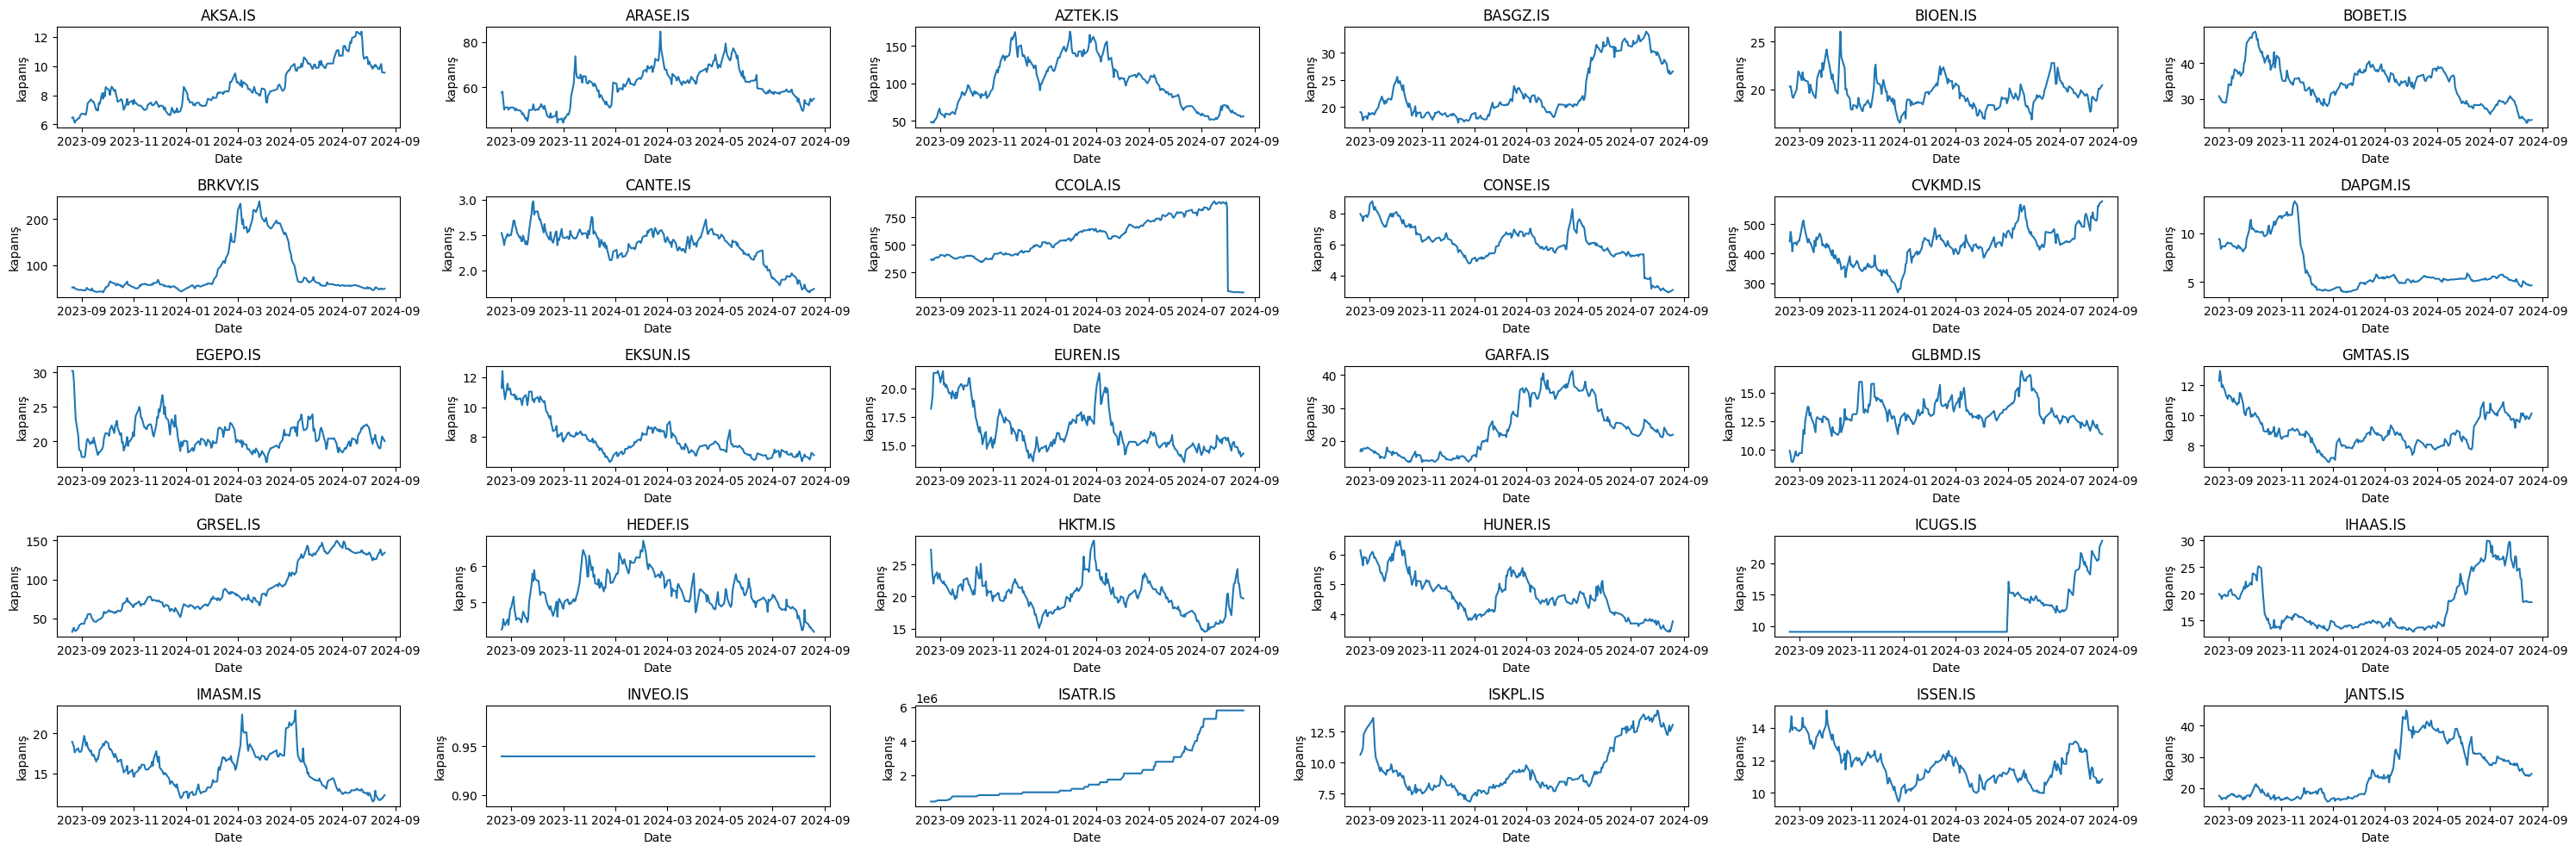

In [142]:
close_columns = [col for col in bist_combined_cleaned.columns if 'Close' in col]

first_30_close_symbols = close_columns[:30]

first_30_close_data = bist_combined_cleaned[first_30_close_symbols]

fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(30, 10))  

for i, symbol in enumerate(first_30_close_symbols):
    ax = axs[i // 6, i % 6]  
    

    title = symbol[0] if isinstance(symbol, tuple) else symbol
    
    ax.plot(first_30_close_data.index, first_30_close_data[symbol])
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("kapanış")

plt.tight_layout()
plt.show()

In [130]:
close_data = bist_combined_cleaned.xs('Close', axis=1, level=1)

In [131]:
training_data_lengths = {}
for symbol in close_data.columns:
    data = close_data[symbol].values
    training_data_len = math.ceil(len(data) * 0.9)
    training_data_lengths[symbol] = training_data_len

for symbol, length in training_data_lengths.items():
    print(f"{symbol}: {length}")

AKSA.IS: 225
ARASE.IS: 225
AZTEK.IS: 225
BASGZ.IS: 225
BIOEN.IS: 225
BOBET.IS: 225
BRKVY.IS: 225
CANTE.IS: 225
CCOLA.IS: 225
CONSE.IS: 225
CVKMD.IS: 225
DAPGM.IS: 225
EGEPO.IS: 225
EKSUN.IS: 225
EUREN.IS: 225
GARFA.IS: 225
GLBMD.IS: 225
GMTAS.IS: 225
GRSEL.IS: 225
HEDEF.IS: 225
HKTM.IS: 225
HUNER.IS: 225
ICUGS.IS: 225
IHAAS.IS: 225
IMASM.IS: 225
INVEO.IS: 225
ISATR.IS: 225
ISKPL.IS: 225
ISSEN.IS: 225
JANTS.IS: 225
KARYE.IS: 225
KGYO.IS: 225
KIMMR.IS: 225
KONTR.IS: 225
KOPOL.IS: 225
KRVGD.IS: 225
KTSKR.IS: 225
LIDER.IS: 225
LIDFA.IS: 225
MACKO.IS: 225
MANAS.IS: 225
MOBTL.IS: 225
MTRKS.IS: 225
OBASE.IS: 225
OSMEN.IS: 225
OZSUB.IS: 225
PGSUS.IS: 225
PRDGS.IS: 225
PSGYO.IS: 225
RNPOL.IS: 225
RODRG.IS: 225
RYGYO.IS: 225
SANFM.IS: 225
SARKY.IS: 225
SASA.IS: 225
SEGYO.IS: 225
SEKFK.IS: 225
SELVA.IS: 225
SKYLP.IS: 225
SNICA.IS: 225
SOKE.IS: 225
TATEN.IS: 225
TERA.IS: 225
TUREX.IS: 225
TURSG.IS: 225
ULUUN.IS: 225
YKSLN.IS: 225
YUNSA.IS: 225
ZEDUR.IS: 225


In [132]:
scaled_data_dict = {}

for symbol in close_data.columns:
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = close_data[symbol].values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(data)
    scaled_data_dict[symbol] = scaled_data

scaled_df = pd.DataFrame({symbol: scaled_data_dict[symbol].flatten() for symbol in scaled_data_dict})

print(scaled_df.head())

    AKSA.IS  ARASE.IS  AZTEK.IS  BASGZ.IS  BIOEN.IS  BOBET.IS  BRKVY.IS  \
0  0.054630  0.331004  0.006587  0.116697  0.396624  0.291139  0.053821   
1  0.059960  0.340989  0.002141  0.114303  0.400844  0.266614  0.051287   
2  0.029314  0.244883  0.010044  0.080790  0.349156  0.261076  0.059143   
3  0.000000  0.142536  0.000000  0.025733  0.289030  0.232595  0.046726   
4  0.019320  0.167499  0.020583  0.058049  0.272152  0.227848  0.038719   

   CANTE.IS  CCOLA.IS  CONSE.IS  ...  SNICA.IS   SOKE.IS  TATEN.IS   TERA.IS  \
0  0.651391  0.360255  0.860781  ...  0.352729  0.431915  0.047388  0.041118   
1  0.613929  0.354237  0.842105  ...  0.401351  0.565958  0.098928  0.132841   
2  0.580629  0.361820  0.833616  ...  0.580642  0.469504  0.155655  0.129678   
3  0.519232  0.355922  0.782682  ...  0.383118  0.485106  0.217918  0.071692   
4  0.573344  0.371329  0.831918  ...  0.374001  0.512057  0.286406  0.060095   

   TUREX.IS  TURSG.IS  ULUUN.IS  YKSLN.IS  YUNSA.IS  ZEDUR.IS  
0  0

In [133]:
x_train_dict = {}
y_train_dict = {}

for symbol in scaled_data_dict:
    scaled_data = scaled_data_dict[symbol]
    train_data = scaled_data[0:training_data_lengths[symbol], :]

    x_train = []
    y_train = []
    
    for i in range(15, len(train_data)): # burdaki xx ne kadar önceki veri noktalarını kullanacağını belirtir
        x_train.append(train_data[i-15:i, 0])
        y_train.append(train_data[i, 0])


    x_train_dict[symbol] = np.array(x_train)
    y_train_dict[symbol] = np.array(y_train)

    if len(x_train) > 0 and len(y_train) > 0:
        print(f"Symbol: {symbol}")
        print(f"x_train shape: {x_train_dict[symbol].shape}")
        print(f"y_train shape: {y_train_dict[symbol].shape}")
        print()

example_symbol = list(scaled_data_dict.keys())[0]
print(f"\nExample data from {example_symbol}:")
print(f"x_train first entry: {x_train_dict[example_symbol][0]}")
print(f"y_train first entry: {y_train_dict[example_symbol][0]}")


Symbol: AKSA.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: ARASE.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: AZTEK.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: BASGZ.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: BIOEN.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: BOBET.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: BRKVY.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: CANTE.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: CCOLA.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: CONSE.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: CVKMD.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: DAPGM.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: EGEPO.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: EKSUN.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: EUREN.IS
x_train shape: (210, 15)
y_train shape: (210,)

Symbol: GARFA.IS
x_train s

In [134]:
reshaped_x_train_dict = {}

for symbol in x_train_dict:
    x_train = x_train_dict[symbol]
    reshaped_x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    reshaped_x_train_dict[symbol] = reshaped_x_train

    print(f"Symbol: {symbol}")
    print(f"Reshaped x_train shape: {reshaped_x_train.shape}")
    print()


Symbol: AKSA.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: ARASE.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: AZTEK.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: BASGZ.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: BIOEN.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: BOBET.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: BRKVY.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: CANTE.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: CCOLA.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: CONSE.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: CVKMD.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: DAPGM.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: EGEPO.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: EKSUN.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: EUREN.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: GARFA.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: GLBMD.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: GMTAS.IS
Reshaped x_train shape: (210, 15, 1)

Symbol: GRS

In [135]:
input_shape = (15, 1) #kaç gün öncesinden tahminlemesini seçiyoruz
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [136]:
model = create_model(input_shape)
model.summary()

/Users/tbai/Documents/Vsanaliz/analiz/vproject2/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_162 (LSTM)                 │ (None, 15, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_163 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
save_dir = "BıstTum_models2"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

history_dict = {}
for symbol in reshaped_x_train_dict:
    print(f"egitilen model {symbol}...")
    x_train = reshaped_x_train_dict[symbol]
    y_train = y_train_dict[symbol]

    model = create_model((x_train.shape[1], 1))
    history = model.fit(x_train, y_train, batch_size=1, epochs=16, verbose=1)

    history_dict[symbol] = history

    model_path = os.path.join(save_dir, f"{symbol}_model.h5")
    
    model.save(model_path)
    print(f"kayıt edilen model {symbol} at {model_path}.\n")

saved_files = os.listdir(save_dir)
print("Kaydedilen modeller:", saved_files)

egitilen model AKSA.IS...
Epoch 1/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0340
Epoch 2/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0048
Epoch 3/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0040
Epoch 4/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0041
Epoch 5/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0038
Epoch 6/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0029
Epoch 7/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0050
Epoch 8/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0033
Epoch 9/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0025
Epoch 10/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0020
Epoch 11/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0023
Epoch 12/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0028
Epoch 13/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0022
Epoch 14/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0020
Epoch 15/16
210/

kayıt edilen model AKSA.IS at BıstTum_models1/AKSA.IS_model.h5.

egitilen model ARASE.IS...
Epoch 1/16
210/210 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.0256
Epoch 2/16
 41/210 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0097

KeyboardInterrupt: 

In [107]:
saved_files = os.listdir(save_dir)
print(f"Kaydedilen modeller: {saved_files}")
print(f"Toplam kayıt edilen model sayısı: {len(saved_files)}") #kaç tane eğitildiğini kontrol et

Kaydedilen modeller: ['GARFA.IS_model.h5', 'CONSE.IS_model.h5', 'OSMEN.IS_model.h5', 'RODRG.IS_model.h5', 'IHAAS.IS_model.h5', 'TERA.IS_model.h5', 'GMTAS.IS_model.h5', 'TATEN.IS_model.h5', 'SKYLP.IS_model.h5', 'OZSUB.IS_model.h5', 'SANFM.IS_model.h5', 'CANTE.IS_model.h5', 'CCOLA.IS_model.h5', 'SASA.IS_model.h5', 'MANAS.IS_model.h5', 'TUREX.IS_model.h5', 'ISATR.IS_model.h5', 'ISKPL.IS_model.h5', 'KARYE.IS_model.h5', 'SELVA.IS_model.h5', 'YKSLN.IS_model.h5', 'ZEDUR.IS_model.h5', 'EKSUN.IS_model.h5', 'RYGYO.IS_model.h5', 'KRVGD.IS_model.h5', 'OBASE.IS_model.h5', 'INVEO.IS_model.h5', 'YUNSA.IS_model.h5', 'LIDER.IS_model.h5', 'HEDEF.IS_model.h5', 'HUNER.IS_model.h5', 'GRSEL.IS_model.h5', 'MACKO.IS_model.h5', 'KOPOL.IS_model.h5', 'EGEPO.IS_model.h5', 'JANTS.IS_model.h5', 'DAPGM.IS_model.h5', 'ULUUN.IS_model.h5', 'AKSA.IS_model.h5', 'KONTR.IS_model.h5', 'TURSG.IS_model.h5', 'BOBET.IS_model.h5', 'ICUGS.IS_model.h5', 'HKTM.IS_model.h5', 'ARASE.IS_model.h5', 'KIMMR.IS_model.h5', 'IMASM.IS_model.